### Smoke PM<sub>2.5</sub> and asthma care utilization time series

Creating plot of asthma rate plot overlapped with smoke PM<sub>2.5</sub> time series for Oregon metro areas. ggplot2 won't allow it so I'm using python seaborn and matlab.

In [116]:
# import pandas
import pandas as pd
# import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
# import seaborn
import seaborn as sns
# date formater
import matplotlib.dates as mdates

Importing MSA PM and asthma care utilization files I saved from the R script.

In [5]:
# read msa_pm
msa_pm = pd.read_csv('../../data/pm/msa_pm.csv')
# view msa_pm
msa_pm.head()

,ZIPCODE,date,wrf_f_pm,wrf_nf_pm,wrf_smk_pm,geo_wt_pm,krig_pm,background_pm,geo_smk_pm,krig_smk_pm,wrf_temp,MSA,metroarea
0,97002,2013-05-01,25.760216,25.735220,0.024996,5.296273,3.797503,5.103887,0.192386,0.000000,282.212794,41420,Salem
1,97002,2013-05-02,22.837059,22.412890,0.424169,5.233307,3.938430,5.103887,0.129420,0.000000,286.869509,41420,Salem
2,97002,2013-05-03,27.118143,26.272239,0.845904,5.141309,3.483095,5.103887,0.063008,0.000000,287.191140,41420,Salem
3,97002,2013-05-04,20.993787,19.526302,1.467485,5.026130,3.801929,5.103887,0.034427,0.000000,289.384913,41420,Salem
4,97002,2013-05-05,20.144330,17.060137,3.084193,5.344230,4.291375,5.103887,0.240343,0.051716,290.035815,41420,Salem


In [29]:
# read weekly counts 
msa_asthma = pd.read_csv('../../data/health/asthma_weekly_count.csv')
# view head of asthma counts
msa_asthma.head()

,week_date,metroarea,service_place,n_events,pop,rate_100k
0,2013-05-05,Bend,Emergency Department,3,165270,1.815211
1,2013-05-05,Bend,Inpatient Hospital,2,165270,1.210141
2,2013-05-05,Bend,Office,49,165270,29.648454
3,2013-05-05,Bend,Outpatient Hospital,7,165270,4.235493
4,2013-05-05,Bend,SABA Fill,20,165270,12.101410


Checking data types of MSA count columns. It looks like I need to convert week_date to date object.

In [38]:
# data types 
print(msa_asthma.dtypes)
# convert to date time
msa_asthma['week_date'] = pd.to_datetime(msa_asthma['week_date'], format = '%Y-%m-%d')

week_date         object
metroarea         object
service_place     object
n_events           int64
pop                int64
rate_100k        float64
dtype: object


In [42]:
# range of converted datetime
print(msa_asthma['week_date'].min(), msa_asthma['week_date'].max())

2013-05-05 00:00:00 2013-09-29 00:00:00


Attempting to replicate small multiples plot. Joining the two data frames together.

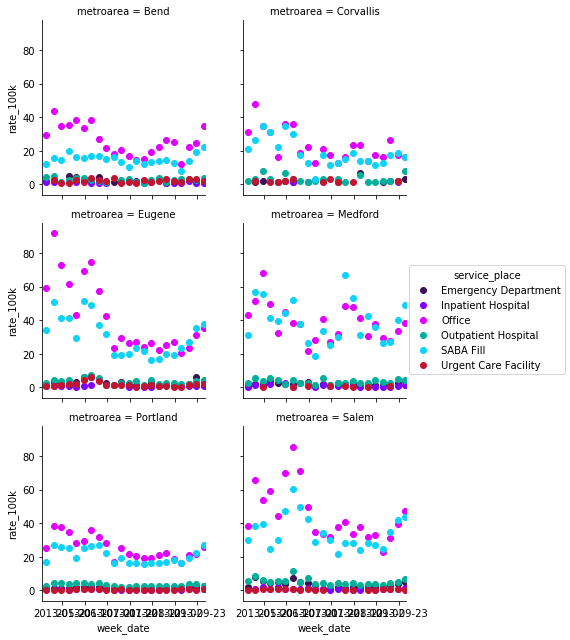

In [139]:
# define custom palette
custom_pal = ["#3c1053", "#7f00ff", "#e100ff", "#00b09b", "#0ed2f7", "#c31432"]
# set custom color palette; does this need to be defined before the plot?
sns.set_palette(custom_pal)


# i think i define the facet grid here
g = sns.FacetGrid(msa_asthma, col = 'metroarea', col_wrap=2, 
                  hue='service_place')
# i think i amp for each metroarea in the dataframe to make plots to fill grid
g = (g.map(plt.scatter, 'week_date', 'rate_100k')
     # add legend
     .add_legend()).set(xlim=('2013-05-01', '2013-09-30'))
# format tick lables to just month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

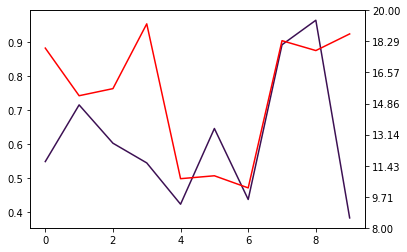

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

np.random.seed(0)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(pd.Series(np.random.uniform(0, 1, size=10)))
ax2 = ax1.twinx()
ax2.plot(pd.Series(np.random.uniform(10, 20, size=10)), color='r')

# ADD THIS LINE
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

plt.show()